### Sales (sid, year, totalsales)
### Create above table into a SQLite database with appropriate constraints. 

In [1]:
import sqlite3

In [6]:
conn = sqlite3.connect("your_database.db")
cursor = conn.cursor()
create_table_sql = """
CREATE TABLE Sales1 (
    sid INTEGER PRIMARY KEY,
    year INTEGER NOT NULL,
    totalsales REAL NOT NULL,
    UNIQUE (sid, year)
);
"""
cursor.execute(create_table_sql)
conn.commit()
conn.close()

### A. Insert at least 5-10 records into the sales table. 

In [7]:
import sqlite3
conn = sqlite3.connect("your_database.db")
cursor = conn.cursor()
sales_data = [
    (1, 2022, 1000.0),
    (2, 2022, 1500.0),
    (3, 2022, 800.0),
    (4, 2022, 2000.0),
    (5, 2022, 1200.0),
    (6, 2023, 900.0),
    (7, 2023, 1800.0),
    (8, 2023, 750.0),
    (9, 2023, 3000.0),
    (10, 2023, 1600.0),
]
cursor.executemany("INSERT INTO Sales1 (sid, year, totalsales) VALUES (?, ?, ?)", sales_data)
conn.commit()
conn.close()

### B. Export sales table data into sales.csv file.

In [8]:
import sqlite3
import csv
conn = sqlite3.connect("your_database.db")
cursor = conn.cursor()
cursor.execute("SELECT * FROM Sales1")
sales_data = cursor.fetchall()
csv_file = "sales.csv"
with open(csv_file, "w", newline="") as file:
    csv_writer = csv.writer(file)
    csv_writer.writerow(["sid", "year", "totalsales"])
    csv_writer.writerows(sales_data)
conn.close()
print("Data from the 'Sales' table has been exported to {csv_file}.")

Data from the 'Sales' table has been exported to {csv_file}.


### C. Write a python scripts that read the sales.csv file and plot a bar chart that shows totalsales of the year. 
### Also decorate the chart with appropriate title, lables, colours etc.

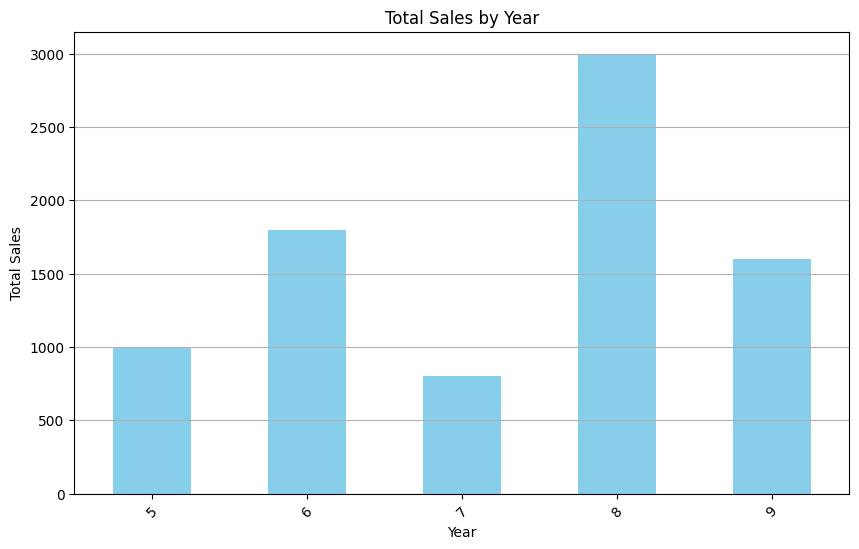

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("sales.csv")
yearly_sales = df.groupby("year")["totalsales"]
plt.figure(figsize=(10, 6))
yearly_sales.plot(kind="bar", color="skyblue")
plt.title("Total Sales by Year")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()